In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [10]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us data has missing values or not
            # df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x1             2227 non-null   float64
 1   x2             2227 non-null   float64
 2   y              2227 non-null   int64  
 3   x1_is_missing  2227 non-null   bool   
 4   x2_is_missing  2227 non-null   bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 56.7 KB


In [16]:
df.drop(['x2_is_missing','x1_is_missing'], axis=1, inplace=True)

In [17]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [18]:
df.isnull().sum()/len(df)

x1    0.0
x2    0.0
y     0.0
dtype: float64

In [19]:
df.corr(method='pearson')

,x1,x2,y
x1,1.000000,0.037285,-0.121200
x2,0.037285,1.000000,-0.026698
y,-0.121200,-0.026698,1.000000


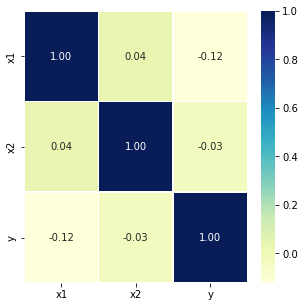

In [24]:
corr_mat = df.corr()
fig,ax = plt.subplots(figsize=[5,5])
ax=sns.heatmap(corr_mat,
               annot = True,
               linewidths = 0.5,
               fmt = (".2f"),
               cmap = "YlGnBu");

In [25]:
np.random.seed(42)

X=df.drop('y',axis=1)
y=df[['y']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

lr = LogisticRegression()

lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(X_test,y_test)

0.5493273542600897

In [81]:
np.random.seed(42)

X=df.drop('y',axis=1)
y=df[['y']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

svm=SVC(kernel = 'linear')

svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
svm.score(X_test,y_test)

0.5426008968609866

In [136]:
np.random.seed(42)

X=df.drop('y',axis=1)
y=df[['y']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

svm=SVC(kernel = 'rbf')

svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
svm.score(X_test,y_test)

0.5201793721973094

In [75]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different LogisticRegression hyperparameters

lr_grid = {"dual" : [False], 
          "fit_intercept" : [True],
          "intercept_scaling" : [1], 
          "l1_ratio" : [None], 
          "max_iter" : [100],
          "multi_class" : ['auto'], 
          "n_jobs" : [None,-1], 
          "penalty" : ['l2'],
          "random_state" : [None], 
          "solver" : ['liblinear'],
          "tol" : [0.0001], 
          "verbose" : [0,True],
          "warm_start" : [False]}

# Instantiate RandomizedSearchCV model
lr_model = RandomizedSearchCV(LogisticRegression(n_jobs=-1,
                                                   random_state=42),
                              param_distributions = lr_grid,
                              n_iter = 5,
                              cv = 5,
                              verbose = True)

lr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/loc

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]CPU times: user 386 ms, sys: 24.3 ms, total: 410 ms
Wall time: 442 ms


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [77]:
lr.score(X_test,y_test)

0.5493273542600897

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


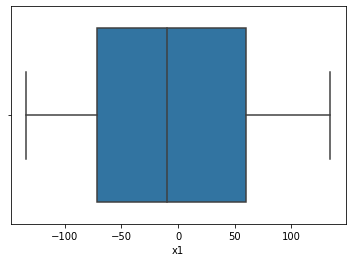

In [83]:
sns.boxplot(df['x1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


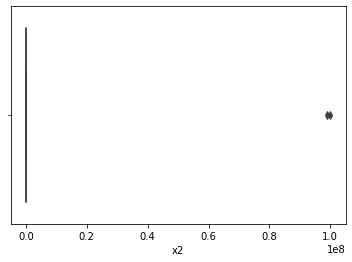

In [84]:
sns.boxplot(df['x2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


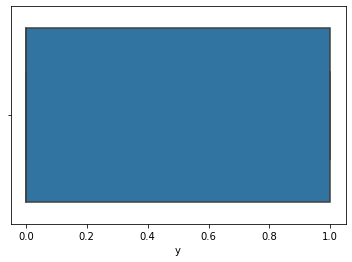

In [85]:
sns.boxplot(df['y'])

In [86]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTree":DecisionTreeClassifier(),
       "SupportVectorMachine":SVC(),
       "KNearestNeibhours" : KNeighborsClassifier()}

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [87]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'DecisionTree': 0.9491778774289985,
 'KNearestNeibhours': 0.9641255605381166,
 'LogisticRegression': 0.5680119581464873,
 'SupportVectorMachine': 0.5426008968609866}

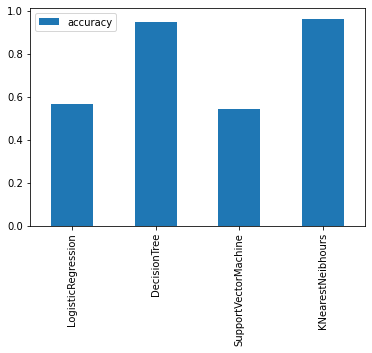

In [135]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred_labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds) 
    f1 = f1_score(y_true, y_preds)
    
    metric_dict= {"accuracy": round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy *100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1 score: {f1:.2f}")
    
    return metric_dict

In [94]:
np.random.seed(42)

# Shuffle the data
df = df.sample(frac=1)

# Split into X & Y
X = df.drop("y", axis=1)
y = df[["y"]]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(df)) ## This contains our 70% of the data
valid_split = round(train_split +0.15 *len(df)) ## This contains our 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# len(X_train), len(X_valid), len(X_test)

DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Make baseline predictions
y_preds=DT.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

baseline_metrics

Accuracy: 93.41%
Precision: 0.92
Recall: 0.93
f1 score: 0.92


{'accuracy': 0.93, 'f1': 0.92, 'precision': 0.92, 'recall': 0.93}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"ccp_alpha" : [0.0], 
        "class_weight" : [None],
        "criterion" : ['gini'],
         "max_depth" : [None],
        "max_features": [None], 
        "max_leaf_nodes" : [None],
        "min_impurity_decrease" : [0.0], 
        "min_impurity_split" : [None],
        "min_samples_leaf" : [1], 
        "min_samples_split" : [2],
        "min_weight_fraction_leaf" : [0.0], 
        "presort" : ['deprecated'],
        "random_state" : [None], 
        "splitter" : ['best']}

# Setup the randomseed
np.random.seed(42)

# Split into X&Y

X = df.drop("y", axis=1)
y = df[["y"]]

# Split into train & test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# Instantiate our model
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Setup RandomizedSearchCV
rs_DT = RandomizedSearchCV(estimator = DT,
                            param_distributions = grid,
                            n_iter = 10, # numbers of models to try
                            cv=5,
                            verbose=2)
# Fit the RandomizedSearchCV version of rfc
rs_DT.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] splitter=best, random_state=None, presort=deprecated, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=1, min_impurity_split=None, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=None, max_depth=None, criterion=gini, class_weight=None, ccp_alpha=0.0 
[CV]  splitter=best, random_state=None, presort=deprecated, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=1, min_impurity_split=None, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=None, max_depth=None, criterion=gini, class_weight=None, ccp_alpha=0.0, total=   0.0s
[CV] splitter=best, random_state=None, presort=deprecated, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=1, min_impurity_split=None, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=None, max_depth=None, criterion=gini, class_weight=None, ccp_alpha=0.0 
[CV]  splitter=best, random_state=None, presort=deprecated, mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [100]:
rs_DT.best_params_

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [101]:
# Make predictions with the best parameters
rs_y_preds = rs_DT.predict(X_test)

# Evaluate the predcitions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 93.05%
Precision: 0.94
Recall: 0.92
f1 score: 0.93


In [120]:
grid2 = {"ccp_alpha" : [0.0], 
        "class_weight" : [None],
        "criterion" : ['gini'],
         "max_depth" : [None],
        "max_features": [None], 
        "max_leaf_nodes" : [None],
        "min_impurity_decrease" : [0.0], 
        "min_impurity_split" : [None],
        "min_samples_leaf" : [1], 
        "min_samples_split" : [2],
        "min_weight_fraction_leaf" : [0.0], 
        "presort" : ['deprecated'],
        "random_state" : [None], 
        "splitter" : ['best']}

In [126]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X=df.drop("y",axis=1)
y=df[["y"]]

# Split into train & test set
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

# Instantiate DT
DT=DecisionTreeClassifier()

# Setup GridSearchCV
gs_DT=GridSearchCV(estimator=DT,
                   param_grid = grid2,
                   cv=5)

# Fit the GridSearchCV version of DT
gs_DT.fit(X_train, y_train);

In [127]:
gs_DT.best_params_

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [128]:
gs_y_preds = gs_DT.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 92.83%
Precision: 0.94
Recall: 0.91
f1 score: 0.93


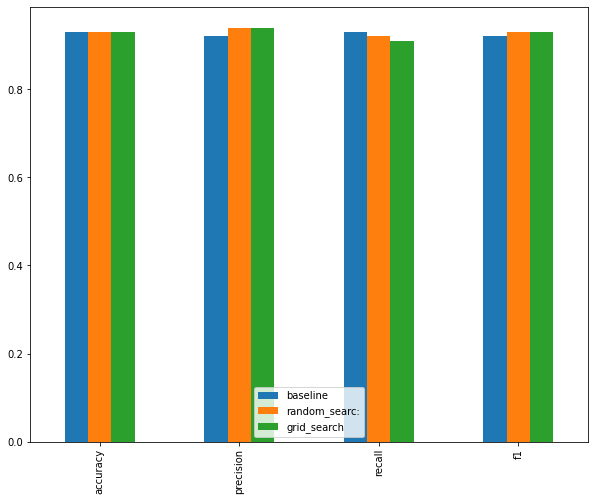

In [130]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "random_searc:": rs_metrics,
                                "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

So in this Particular Task we have done some model building and as well as some preprocessing in the early stage of our data. As soon as we applied Model building techniques in our data. The things became sorted but when we get the accuracy from various models. We then saw all the scores of the other models and compared all the baseline scores achieved by our Algorithms. So we performed hyperparameter tuning on only 2 of the models just because Decision Tree and K nearest neibhours were having higher accuracy compared with other ones.

                                                                        *******